In [39]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("train_20240719.csv")

In [6]:
train

,date,hour,crawds_level,weekday,arena_start_time_in_0,arena_max_price_0,arena_min_price_0,arena_num_of_people_0,arena_start_time_in_1,arena_max_price_1,...,garden_theater_num_of_people_1,garden_theater_start_time_in_2,garden_theater_max_price_2,garden_theater_min_price_2,garden_theater_num_of_people_2,temperature,humidity,cloud,chance_of_rain,weather
0,2024-05-24,8,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.4,70,8,0,1
1,2024-05-24,9,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.0,66,92,0,2
2,2024-05-24,10,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.6,62,100,0,2
3,2024-05-24,11,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.7,57,100,0,2
4,2024-05-24,12,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.8,53,100,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,2024-07-19,18,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.7,69,47,0,2
821,2024-07-19,19,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,73,45,0,2
822,2024-07-19,20,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.6,75,49,0,2
823,2024-07-19,21,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.3,77,46,0,2


### 休日設定

In [19]:
# 祝日リスト
holiday_list = ["2024-01-01","2024-01-08","2024-02-11","2024-02-12","2024-02-23","2024-03-20","2024-04-29","2024-05-03","2024-05-04","2024-05-05","2024-05-06","2024-07-15","2024-08-11","2024-08-12","2024-09-16","2024-09-22","2024-09-23","2024-10-14","2024-11-03","2024-11-04","2024-11-23"]

In [21]:
train["holiday"]=False
for index, row in train.iterrows():
    # 土日
    if train.loc[index,"weekday"] == 5 or train.loc[index,"weekday"] == 6:
        train.loc[index, "holiday"] = True
    # 祝日
    if train.loc[index, "date"] in holiday_list:
        train.loc[index, "holiday"] = True

In [22]:
train["holiday"].value_counts()

holiday
False    570
True     255
Name: count, dtype: int64

### イベント有無

In [29]:
train["event"] = False
for index, row in train.iterrows():
    if not (np.isnan(train.loc[index, "arena_start_time_in_0"])):
        train.loc[index, "event"] = True
    if not (np.isnan(train.loc[index, "garden_theater_start_time_in_0"])):
        train.loc[index, "event"] = True

In [30]:
train["event"].value_counts()

event
True     525
False    300
Name: count, dtype: int64

### 混雑度合を2値化

In [89]:
train["crawds_level_binary"] = False
train["crawds_level_binary"] = train["crawds_level"]==3

## EDA

### イベント有無、平日/祝日での混雑分布比較

In [90]:
train_noevent_weekday = train[(train["holiday"] != True) & (train["event"] != True)]
train_event_weekday = train[(train["holiday"] != True) & (train["event"] == True)]
train_noevent_holiday = train[(train["holiday"] == True) & (train["event"] != True)]
train_event_holiday = train[(train["holiday"] == True) & (train["event"] == True)]

In [111]:
for df in [train, train_noevent_weekday, train_event_weekday, train_noevent_holiday, train_event_holiday]:
    print(len(df))

825
270
300
30
225


In [ ]:
len()

In [112]:
train_noevent_weekday["hour"].value_counts()

hour
8     18
9     18
10    18
11    18
12    18
13    18
14    18
15    18
16    18
17    18
18    18
19    18
20    18
21    18
22    18
Name: count, dtype: int64

In [91]:
train_noevent_weekday

,date,hour,crawds_level,weekday,arena_start_time_in_0,arena_max_price_0,arena_min_price_0,arena_num_of_people_0,arena_start_time_in_1,arena_max_price_1,...,garden_theater_min_price_2,garden_theater_num_of_people_2,temperature,humidity,cloud,chance_of_rain,weather,holiday,event,crawds_level_binary
0,2024-05-24,8,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.4,70,8,0,1,False,False,False
1,2024-05-24,9,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.0,66,92,0,2,False,False,False
2,2024-05-24,10,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.6,62,100,0,2,False,False,False
3,2024-05-24,11,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.7,57,100,0,2,False,False,False
4,2024-05-24,12,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.8,53,100,0,2,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2024-07-16,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.7,86,100,45,3,False,False,False
776,2024-07-16,19,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.6,86,100,45,3,False,False,False
777,2024-07-16,20,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.5,87,100,100,3,False,False,False
778,2024-07-16,21,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.5,87,100,45,3,False,False,False


In [54]:
from pylab import rcParams

In [94]:
rcParams['figure.figsize'] = 15, 2
plt.tight_layout()

<Figure size 1500x200 with 0 Axes>

対象日数：18


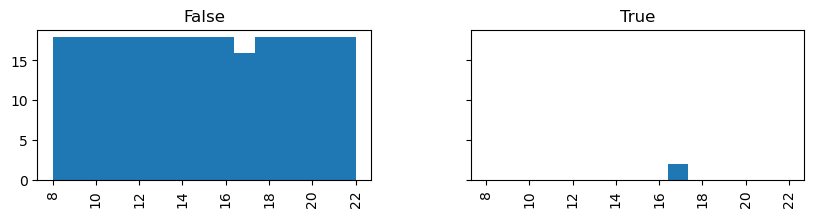

対象日数：20


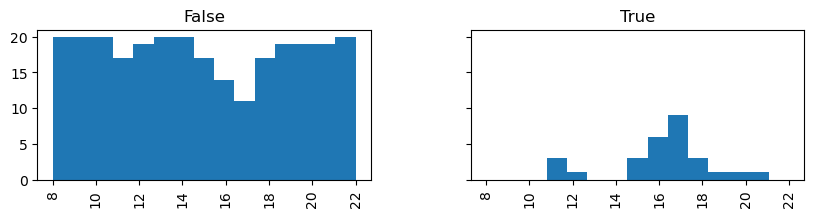

対象日数：2


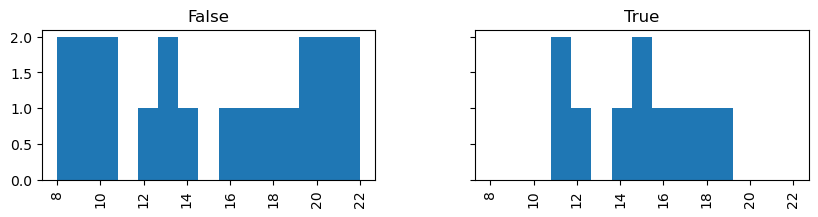

対象日数：15


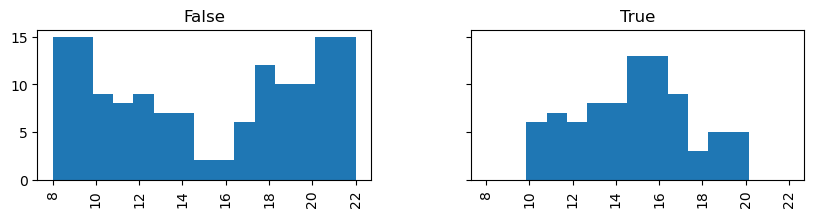

In [118]:
for df in [train_noevent_weekday, train_event_weekday, train_noevent_holiday, train_event_holiday]:
    print("対象日数：{}".format(len(df["date"].unique())))
    df[["hour","crawds_level_binary"]].hist(column="hour",by="crawds_level_binary", layout=(1,3), sharex=True, sharey=True, bins=15, range=[8,22])
    plt.show()